#**Step1: Import Library**

In [ ]:
import numpy as np
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Step2: Reading File**

In [ ]:
df3 = pd.read_excel("/content/drive/MyDrive/NCKH/Data_Gianha/HCM/Ho_chi_minh_24_9_v2.xlsx", sheet_name=0)
df4 = pd.read_excel("/content/drive/MyDrive/NCKH/Data_Gianha/HCM/Data_16_10.xlsx", sheet_name=0)

In [ ]:
df3 = pd.concat([df3,df4])

In [ ]:
df3.head()

,ID,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Direction,Area,Length,Width,Rooms,Floors,Price,Address,Weight
0,0.0,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,No,7.0,Dưới 10,NaN,65.0,15.5,4.15,4.0,3.0,6.55 tỷ,"Đường Số 10, Phường Hiệp Bình Phước, Thành ph...",3.0
1,1.0,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,14.0,10-15m,NaN,87.0,21.0,4.10,8.0,5.0,14.7 tỷ,"Đường Gò Dưa, Phường Tam Bình, Thành phố Thủ ...",2.0
2,2.0,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,8.0,Dưới 10,NaN,80.0,16.0,5.00,4.0,4.0,7.2 tỷ,"Đường Số 8, Phường Hiệp Bình Chánh, Thành phố...",2.0
3,3.0,2022-09-24,Huyện Hóc Môn,HCM,1.9,"Đất thổ cư, đất ở",Yes,6.0,Dưới 10,Đông Nam,100.0,25.0,4.00,0.0,0.0,480 triệu,"Đường Nguyễn Văn Bứa, Xã Xuân Thới Sơn, Huyện...",2.0
4,4.0,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,8.0,Dưới 10,Tây Bắc,58.0,15.0,4.00,4.0,4.0,8.2 tỷ,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố...",2.0


In [ ]:
df = df3.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27004 entries, 0 to 7023
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             27004 non-null  float64       
 1   Date           27004 non-null  datetime64[ns]
 2   District       27004 non-null  object        
 3   Province       27004 non-null  object        
 4   Hsdieuchinh    27004 non-null  float64       
 5   Type_of_house  27004 non-null  object        
 6   Legal_paper    27004 non-null  object        
 7   WOS            27004 non-null  float64       
 8   WOS_Segment    27004 non-null  object        
 9   Direction      3074 non-null   object        
 10  Area           26987 non-null  float64       
 11  Length         20939 non-null  float64       
 12  Width          21622 non-null  float64       
 13  Rooms          23699 non-null  float64       
 14  Floors         21779 non-null  float64       
 15  Price          26989

In [ ]:
df.tail()

,ID,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Direction,Area,Length,Width,Rooms,Floors,Price,Address,Weight
7019,26999.0,2022-09-14,Quận 1,HCM,2.5,Văn phòng,No,14.45,10-15m,NaN,231.0,NaN,NaN,NaN,NaN,112 tỷ,"Đường Nguyễn Công Trứ, Phường Nguyễn Thái Bìn...",4.0
7020,27000.0,2022-09-09,Huyện Nhà Bè,HCM,1.9,Văn phòng,No,14.45,10-15m,NaN,40.0,NaN,NaN,NaN,NaN,1.9 tỷ,"Đường Nguyễn Hữu Thọ, Xã Phước Lộc, Huyện Nhà...",2.0
7021,27001.0,2022-09-05,Quận Bình Thạnh,HCM,2.3,Văn phòng,Yes,30.00,30-40m,NaN,196.0,NaN,NaN,10.0,8.0,55 tỷ,"Đường Điện Biên Phủ, Phường 25, Quận Bình Thạ...",4.0
7022,27002.0,2022-08-29,Thành phố Thủ Đức,HCM,2.1,Văn phòng,No,12.00,10-15m,NaN,559.0,NaN,NaN,10.0,5.0,145 tỷ,"Đường Lê Văn Miến, Phường Thảo Điền, Thành ph...",2.0
7023,27003.0,2022-08-21,Quận Tân Bình,HCM,2.5,Văn phòng,No,20.00,20-30m,NaN,845.0,17.0,7.1,7.0,7.0,35 tỷ,"Đường Ba Vì, Phường 4, Quận Tân Bình, HCM",4.0


In [ ]:
df = df.drop(['Direction'], axis=1)

##**Let's do some statistics**

In [ ]:
df.describe()

,ID,Hsdieuchinh,WOS,Area,Length,Width,Rooms,Floors,Weight
count,27004.000000,27004.000000,27004.000000,2.698700e+04,20939.000000,21622.000000,23699.000000,21779.000000,27004.000000
mean,13501.500000,2.283906,11.274934,4.832645e+02,19.413970,7.731309,6.568421,3.161164,3.553585
std,7795.527671,0.192155,9.360062,9.950696e+03,50.880722,12.763597,12.380661,2.310047,1.120478
min,0.000000,1.700000,0.000000,4.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000
25%,6750.750000,2.100000,5.000000,6.200000e+01,11.000000,4.000000,2.000000,2.000000,3.000000
50%,13501.500000,2.300000,8.000000,9.000000e+01,16.000000,5.000000,4.000000,3.000000,4.000000
75%,20252.250000,2.500000,14.450000,1.690000e+02,22.000000,7.500000,6.000000,4.000000,4.000000
max,27003.000000,2.500000,375.000000,1.540000e+06,6000.000000,522.000000,414.000000,75.000000,5.000000


#**Step3: Cleaning data**

In [ ]:
df = df.drop(['ID'], axis=1)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25524 entries, 0 to 7023
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           25524 non-null  datetime64[ns]
 1   District       25524 non-null  object        
 2   Province       25524 non-null  object        
 3   Hsdieuchinh    25524 non-null  float64       
 4   Type_of_house  25524 non-null  object        
 5   Legal_paper    25524 non-null  object        
 6   WOS            25524 non-null  float64       
 7   WOS_Segment    25524 non-null  object        
 8   Area           25509 non-null  float64       
 9   Length         19780 non-null  float64       
 10  Width          20409 non-null  float64       
 11  Rooms          22258 non-null  float64       
 12  Floors         20361 non-null  float64       
 13  Price          25510 non-null  object        
 14  Address        25524 non-null  object        
 15  Weight         25524

In [ ]:
# df_renamed = df.rename(columns = {
#                                   "Quận. Huyện":"district",
#                                   "Ngày":"Date",
#                                   "Tỉnh":"province",
#                                   "LoạiBDS":"type_of_housing",
#                                   "Pháplý":"legal_paper",
#                                   "Đườngtrướcnhà": "Wide_of_street",
#                                   "Hướng": "Direction",
#                                   "Số lầu":"num_floors",
#                                   "Số phòng":"num_bed_rooms",
#                                   "Dientich":"squared_meter_area",
#                                   "Dài":"length_meter", 
#                                   "Rộng":"width_meter", 
#                                   "Trọngsố":"weight",
#                                   "Giá":"price"})
#df = df.dropna()
#df.reset_index()

# # The length of the dataset after dropping null values
#print("The length of the dataset ", str(len(df)), "rows.")

In [ ]:
df.head()

,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight
0,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,No,7.0,Dưới 10,65.0,15.5,4.15,4.0,3.0,6.55 tỷ,"Đường Số 10, Phường Hiệp Bình Phước, Thành ph...",3.0
1,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,14.0,10-15m,87.0,21.0,4.10,8.0,5.0,14.7 tỷ,"Đường Gò Dưa, Phường Tam Bình, Thành phố Thủ ...",2.0
2,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,8.0,Dưới 10,80.0,16.0,5.00,4.0,4.0,7.2 tỷ,"Đường Số 8, Phường Hiệp Bình Chánh, Thành phố...",2.0
3,2022-09-24,Huyện Hóc Môn,HCM,1.9,"Đất thổ cư, đất ở",Yes,6.0,Dưới 10,100.0,25.0,4.00,0.0,0.0,480 triệu,"Đường Nguyễn Văn Bứa, Xã Xuân Thới Sơn, Huyện...",2.0
4,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,8.0,Dưới 10,58.0,15.0,4.00,4.0,4.0,8.2 tỷ,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố...",2.0


##**Cleaning data in each column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25524 entries, 0 to 7023
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           25524 non-null  datetime64[ns]
 1   District       25524 non-null  object        
 2   Province       25524 non-null  object        
 3   Hsdieuchinh    25524 non-null  float64       
 4   Type_of_house  25524 non-null  object        
 5   Legal_paper    25524 non-null  object        
 6   WOS            25524 non-null  float64       
 7   WOS_Segment    25524 non-null  object        
 8   Area           25509 non-null  float64       
 9   Length         19780 non-null  float64       
 10  Width          20409 non-null  float64       
 11  Rooms          22258 non-null  float64       
 12  Floors         20361 non-null  float64       
 13  Price          25510 non-null  object        
 14  Address        25524 non-null  object        
 15  Weight         25524

In [ ]:
#df.drop(labels="index",axis=1, inplace=True)

In [ ]:
df.head()

,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight
0,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,No,7.0,Dưới 10,65.0,15.5,4.15,4.0,3.0,6.55 tỷ,"Đường Số 10, Phường Hiệp Bình Phước, Thành ph...",3.0
1,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,14.0,10-15m,87.0,21.0,4.10,8.0,5.0,14.7 tỷ,"Đường Gò Dưa, Phường Tam Bình, Thành phố Thủ ...",2.0
2,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,8.0,Dưới 10,80.0,16.0,5.00,4.0,4.0,7.2 tỷ,"Đường Số 8, Phường Hiệp Bình Chánh, Thành phố...",2.0
3,2022-09-24,Huyện Hóc Môn,HCM,1.9,"Đất thổ cư, đất ở",Yes,6.0,Dưới 10,100.0,25.0,4.00,0.0,0.0,480 triệu,"Đường Nguyễn Văn Bứa, Xã Xuân Thới Sơn, Huyện...",2.0
4,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,8.0,Dưới 10,58.0,15.0,4.00,4.0,4.0,8.2 tỷ,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố...",2.0


###**District**

In [ ]:
df['District'] = df['District'].astype(str)

In [ ]:
df['District'].unique()

array(['Thành phố Thủ Đức', 'Huyện Hóc Môn', 'Huyện Củ Chi',
       'Quận Bình Thạnh', 'Huyện Bình Chánh', 'Quận 10', 'Quận 12',
       'Quận 3', 'Quận Bình Tân', 'Quận 5', 'Quận Tân Bình',
       'Quận Gò Vấp', 'Quận 1', 'Quận Tân Phú', 'Quận Phú Nhuận',
       'Huyện Nhà Bè', 'Quận 11', 'Quận 7', 'Quận 8', 'Quận 4', 'Quận 6',
       'Quận 2', 'Quận 9', 'Huyện Cần Giờ'], dtype=object)

###**Type_of_housing**

In [ ]:
df['Type_of_house'].unique()

array(['Nhà mặt tiền', 'Đất thổ cư, đất ở', 'Nhà trong hẻm',
       'Biệt thự, nhà liền kề', 'Căn hộ chung cư',
       'Đất nền, liền kề, đất dự án', 'Đất nông, lâm nghiệp', 'Mặt bằng',
       'Phòng trọ, nhà trọ', 'Kho, xưởng', 'Nhà hàng, khách sạn',
       'Văn phòng', 'Shop, kiot, quán', 'Các loại khác', 'Trang trại'],
      dtype=object)

In [ ]:
df['Type_of_house'] = df['Type_of_house'].fillna("Các loại khác")

###**WOS**

In [ ]:
df['WOS'] = df['WOS'].astype(float)

In [ ]:
#df['WOS_fixed'] = df['WOS_fixed'].fillna(round(df['WOS_fixed'].mean(),2))

In [ ]:
#df['WOS_fixed']

###**Num_floors**

- Chung cư thì chỉ có 1 tầng, còn đất bán thì không có tầng nào

In [ ]:
df.head()

,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight
0,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,No,7.0,Dưới 10,65.0,15.5,4.15,4.0,3.0,6.55 tỷ,"Đường Số 10, Phường Hiệp Bình Phước, Thành ph...",3.0
1,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,14.0,10-15m,87.0,21.0,4.10,8.0,5.0,14.7 tỷ,"Đường Gò Dưa, Phường Tam Bình, Thành phố Thủ ...",2.0
2,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,8.0,Dưới 10,80.0,16.0,5.00,4.0,4.0,7.2 tỷ,"Đường Số 8, Phường Hiệp Bình Chánh, Thành phố...",2.0
3,2022-09-24,Huyện Hóc Môn,HCM,1.9,"Đất thổ cư, đất ở",Yes,6.0,Dưới 10,100.0,25.0,4.00,0.0,0.0,480 triệu,"Đường Nguyễn Văn Bứa, Xã Xuân Thới Sơn, Huyện...",2.0
4,2022-09-24,Thành phố Thủ Đức,HCM,2.1,Nhà mặt tiền,Yes,8.0,Dưới 10,58.0,15.0,4.00,4.0,4.0,8.2 tỷ,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố...",2.0


In [ ]:
df.columns

Index(['Date', 'District', 'Province', 'Hsdieuchinh', 'Type_of_house',
       'Legal_paper', 'WOS', 'WOS_Segment', 'Area', 'Length', 'Width', 'Rooms',
       'Floors', 'Price', 'Address', 'Weight'],
      dtype='object')

In [ ]:
df.Floors

0       3.0
1       5.0
2       4.0
3       0.0
4       4.0
       ... 
7019    NaN
7020    NaN
7021    8.0
7022    5.0
7023    7.0
Name: Floors, Length: 25524, dtype: float64

In [ ]:
df.shape[0]

25524

In [ ]:
df.sort_values(by=['Type_of_house'], inplace = True)

In [ ]:
df.head()

,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight
12480,2022-09-23,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,7.0,Dưới 10,85.0,NaN,1.0,6.0,4.0,20.8 tỷ,"Đường Bạch Đằng, Phường 2, Quận Tân Bình, Hồ ...",4.0
18161,2022-09-23,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.0,9.0,1.0,2.0,42 tỷ,"Đường Sương Nguyệt Ánh, Phường Bến Thành, Quậ...",4.0
18162,2022-09-23,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.0,9.0,1.0,2.0,42 tỷ,"Đường Bùi Thị Xuân, Phường Bến Thành, Quận 1,...",5.0
16604,2022-09-23,Quận Gò Vấp,HCM,2.3,"Biệt thự, nhà liền kề",Yes,15.0,15-20m,114.0,19.0,6.0,5.0,5.0,27 tỷ,"Đường Phan Văn Trị, Phường 5, Quận Gò Vấp, Hồ...",5.0
4838,2022-09-23,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,8.0,Dưới 10,160.0,16.0,1.0,50.0,7.0,20 tỷ,"Đường Cửu Long, Phường 2, Quận Tân Bình, Hồ C...",2.0


In [ ]:
df['Floors'] = df['Floors'].fillna(method="bfill")

In [ ]:
df['Floors'] = df['Floors'].fillna(method="ffill")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25524 entries, 12480 to 4746
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           25524 non-null  datetime64[ns]
 1   District       25524 non-null  object        
 2   Province       25524 non-null  object        
 3   Hsdieuchinh    25524 non-null  float64       
 4   Type_of_house  25524 non-null  object        
 5   Legal_paper    25524 non-null  object        
 6   WOS            25524 non-null  float64       
 7   WOS_Segment    25524 non-null  object        
 8   Area           25509 non-null  float64       
 9   Length         19780 non-null  float64       
 10  Width          20409 non-null  float64       
 11  Rooms          22258 non-null  float64       
 12  Floors         25524 non-null  float64       
 13  Price          25510 non-null  object        
 14  Address        25524 non-null  object        
 15  Weight         2

In [ ]:
df.tail()

,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight
3248,2022-09-24,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,16.0,15-20m,216.0,18.0,12.0,0.0,0.0,18.5 tỷ,"Quốc Lộ 13, Phường Hiệp Bình Phước, Thành phố...",2.0
3247,2022-09-24,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,5.0,Dưới 10,81.0,21.0,4.0,0.0,0.0,4.65 tỷ,"Đại Lộ 13, Phường Hiệp Bình Chánh, Thành phố ...",2.0
3246,2022-09-24,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,7.0,Dưới 10,81.0,14.0,6.0,0.0,0.0,3.6 tỷ,"Đường Kênh Ba Bò, Phường Bình Chiểu, Thành ph...",3.0
3244,2022-09-24,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,4.0,Dưới 10,210.0,2.0,1.0,0.0,0.0,10 tỷ,"Đường Hiệp Bình, Phường Hiệp Bình Chánh, T...",2.0
4746,2022-09-23,Quận Bình Thạnh,HCM,2.3,"Đất thổ cư, đất ở",Yes,20.0,20-30m,120.0,2.0,6.0,0.0,0.0,4.2 tỷ,"Đường Đặng Thuỳ Trâm, Phường 13, Quận Bình Th...",2.0


In [ ]:
df['Floors'] = df['Floors'].astype(int)

###**Num_beds**

- Dất bán thì không phong nào

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25524 entries, 12480 to 4746
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           25524 non-null  datetime64[ns]
 1   District       25524 non-null  object        
 2   Province       25524 non-null  object        
 3   Hsdieuchinh    25524 non-null  float64       
 4   Type_of_house  25524 non-null  object        
 5   Legal_paper    25524 non-null  object        
 6   WOS            25524 non-null  float64       
 7   WOS_Segment    25524 non-null  object        
 8   Area           25509 non-null  float64       
 9   Length         19780 non-null  float64       
 10  Width          20409 non-null  float64       
 11  Rooms          22258 non-null  float64       
 12  Floors         25524 non-null  int64         
 13  Price          25510 non-null  object        
 14  Address        25524 non-null  object        
 15  Weight         2

In [ ]:
df['Rooms'] = df['Rooms'].fillna(method="ffill")

In [ ]:
df['Rooms'] = df['Rooms'].fillna(method="bfill")

In [ ]:
df['Rooms'] = df['Rooms'].astype(int)

In [ ]:
df.head()

,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight
12480,2022-09-23,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,7.0,Dưới 10,85.0,NaN,1.0,6,4,20.8 tỷ,"Đường Bạch Đằng, Phường 2, Quận Tân Bình, Hồ ...",4.0
18161,2022-09-23,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.0,9.0,1,2,42 tỷ,"Đường Sương Nguyệt Ánh, Phường Bến Thành, Quậ...",4.0
18162,2022-09-23,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.0,9.0,1,2,42 tỷ,"Đường Bùi Thị Xuân, Phường Bến Thành, Quận 1,...",5.0
16604,2022-09-23,Quận Gò Vấp,HCM,2.3,"Biệt thự, nhà liền kề",Yes,15.0,15-20m,114.0,19.0,6.0,5,5,27 tỷ,"Đường Phan Văn Trị, Phường 5, Quận Gò Vấp, Hồ...",5.0
4838,2022-09-23,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,8.0,Dưới 10,160.0,16.0,1.0,50,7,20 tỷ,"Đường Cửu Long, Phường 2, Quận Tân Bình, Hồ C...",2.0


###**Square_meter_area**

In [ ]:
df['Area'] = df['Area'].astype(float)

In [ ]:
df['Area'] = df['Area'].fillna(method="ffill")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25524 entries, 12480 to 4746
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           25524 non-null  datetime64[ns]
 1   District       25524 non-null  object        
 2   Province       25524 non-null  object        
 3   Hsdieuchinh    25524 non-null  float64       
 4   Type_of_house  25524 non-null  object        
 5   Legal_paper    25524 non-null  object        
 6   WOS            25524 non-null  float64       
 7   WOS_Segment    25524 non-null  object        
 8   Area           25524 non-null  float64       
 9   Length         19780 non-null  float64       
 10  Width          20409 non-null  float64       
 11  Rooms          25524 non-null  int64         
 12  Floors         25524 non-null  int64         
 13  Price          25510 non-null  object        
 14  Address        25524 non-null  object        
 15  Weight         2

###**Length and Width**

In [ ]:
df['Length'] = df['Length'].astype(float)

In [ ]:
df["Width"] = df["Width"].astype(float)

In [ ]:
df.loc[df["Length"] == None]

,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight


In [ ]:
df['Length'] = df['Length'].where(df['Length'] != None, df['Area']/df['Width'] )

In [ ]:
df['Width'] = df['Width'].where(df['Width'] != None, df['Area']/df['Length'] )

In [ ]:
df['Width'] = df['Width'].fillna(df['Area']/4)

In [ ]:
df['Length'] = df['Length'].fillna(3*df['Area']/4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25524 entries, 12480 to 4746
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           25524 non-null  datetime64[ns]
 1   District       25524 non-null  object        
 2   Province       25524 non-null  object        
 3   Hsdieuchinh    25524 non-null  float64       
 4   Type_of_house  25524 non-null  object        
 5   Legal_paper    25524 non-null  object        
 6   WOS            25524 non-null  float64       
 7   WOS_Segment    25524 non-null  object        
 8   Area           25524 non-null  float64       
 9   Length         25524 non-null  float64       
 10  Width          25524 non-null  float64       
 11  Rooms          25524 non-null  int64         
 12  Floors         25524 non-null  int64         
 13  Price          25510 non-null  object        
 14  Address        25524 non-null  object        
 15  Weight         2

###**Price_in_million**

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25510 entries, 12480 to 4746
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           25510 non-null  datetime64[ns]
 1   District       25510 non-null  object        
 2   Province       25510 non-null  object        
 3   Hsdieuchinh    25510 non-null  float64       
 4   Type_of_house  25510 non-null  object        
 5   Legal_paper    25510 non-null  object        
 6   WOS            25510 non-null  float64       
 7   WOS_Segment    25510 non-null  object        
 8   Area           25510 non-null  float64       
 9   Length         25510 non-null  float64       
 10  Width          25510 non-null  float64       
 11  Rooms          25510 non-null  int64         
 12  Floors         25510 non-null  int64         
 13  Price          25510 non-null  object        
 14  Address        25510 non-null  object        
 15  Weight         2

In [ ]:
# Nhin xem
np.array(df.Price)[:1000]

array(['20.8 tỷ', '42 tỷ', '42 tỷ', '27 tỷ', '20 tỷ', '19 tỷ', '30 tỷ',
       '43 tỷ', '13.5 tỷ', '36 tỷ', '70 tỷ', '9.9 tỷ', '18.9 tỷ', '28 tỷ',
       '48 tỷ', '24 tỷ', '14.8 tỷ', '5.58 tỷ', '11.4 tỷ', '65 tỷ',
       '171.6 tỷ', '22 tỷ', '42 tỷ', '5.25 tỷ', '23 tỷ', '18 tỷ', '28 tỷ',
       '55 tỷ', '51 tỷ', '28.5 tỷ', '49 tỷ', '52 tỷ', '10.8 tỷ', '6 tỷ',
       '13.6 tỷ', '150 tỷ', '70 tỷ', '20 tỷ', '10.3 tỷ', '100 triệu/m2',
       '8.6 tỷ', '17 tỷ', '23.2 tỷ', '5.59 tỷ', '45 tỷ', '90 tỷ',
       '190 tỷ', '110 tỷ', '26.5 tỷ', '34.5 tỷ', '70 tỷ', '43 tỷ',
       '45 tỷ', '8.5 tỷ', '10.2 tỷ', '200 tỷ', '30.7 tỷ', '24.7 tỷ',
       '40 tỷ', '125 tỷ', '14.6 tỷ', '38 tỷ', '132 tỷ', '49 tỷ',
       '18.5 tỷ', '61 tỷ', '62 tỷ', '25 tỷ', '38 tỷ', '36 tỷ', '11.5 tỷ',
       '7.7 tỷ', '50 tỷ', '25 tỷ', '45 tỷ', '95 tỷ', '200 tỷ', '63 tỷ',
       '63 tỷ', '10.5 tỷ', '35 tỷ', '71 tỷ', '28 tỷ', '19 tỷ', '67 tỷ',
       '5 tỷ', '22 tỷ', '20.5 tỷ', '23.8 tỷ', '23 tỷ', '28 tỷ', '14 tỷ',
       

In [ ]:
df.loc[df['Price'].str.contains('triệu/m2', na=False), 'Price'] = df.loc[df['Price'].str.contains('triệu/m2', na=False), 'Price'].str.replace('triệu/m2','').astype(float) * df.loc[df['Price'].str.contains('triệu/m2', na=False), 'Area']
df.loc[df['Price'].str.contains('tỷ/m2', na=False), 'Price'] = df.loc[df['Price'].str.contains('tỷ/m2', na=False), 'Price'].str.replace('tỷ/m2','').astype(float) * df.loc[df['Price'].str.contains('tỷ/m2', na=False), 'Area']*1000

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# ty va trieu
df.loc[df['Price'].str.contains('triệu', na=False), 'Price'] = df.loc[df['Price'].str.contains('triệu', na=False), 'Price'].str.replace('triệu','').astype(float) 
df.loc[df['Price'].str.contains('tỷ', na=False), 'Price'] = df.loc[df['Price'].str.contains('tỷ', na=False), 'Price'].str.replace('tỷ','').astype(float) * 1000

In [ ]:
# Ngan
df.loc[df['Price'].str.contains('ngàn/m2', na=False), 'Price'] = df.loc[df['Price'].str.contains('ngàn/m2', na=False), 'Price'].str.replace('ngàn/m2','').astype(float) * df.loc[df['Price'].str.contains('ngàn/m2', na=False), 'Area']/1000

In [ ]:
df["Price"] = df["Price"].astype(float)

In [ ]:
df.head()

,Date,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight
12480,2022-09-23,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,7.0,Dưới 10,85.0,63.75,1.0,6,4,20800.0,"Đường Bạch Đằng, Phường 2, Quận Tân Bình, Hồ ...",4.0
18161,2022-09-23,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.00,9.0,1,2,42000.0,"Đường Sương Nguyệt Ánh, Phường Bến Thành, Quậ...",4.0
18162,2022-09-23,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.00,9.0,1,2,42000.0,"Đường Bùi Thị Xuân, Phường Bến Thành, Quận 1,...",5.0
16604,2022-09-23,Quận Gò Vấp,HCM,2.3,"Biệt thự, nhà liền kề",Yes,15.0,15-20m,114.0,19.00,6.0,5,5,27000.0,"Đường Phan Văn Trị, Phường 5, Quận Gò Vấp, Hồ...",5.0
4838,2022-09-23,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,8.0,Dưới 10,160.0,16.00,1.0,50,7,20000.0,"Đường Cửu Long, Phường 2, Quận Tân Bình, Hồ C...",2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25510 entries, 12480 to 4746
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           25510 non-null  datetime64[ns]
 1   District       25510 non-null  object        
 2   Province       25510 non-null  object        
 3   Hsdieuchinh    25510 non-null  float64       
 4   Type_of_house  25510 non-null  object        
 5   Legal_paper    25510 non-null  object        
 6   WOS            25510 non-null  float64       
 7   WOS_Segment    25510 non-null  object        
 8   Area           25510 non-null  float64       
 9   Length         25510 non-null  float64       
 10  Width          25510 non-null  float64       
 11  Rooms          25510 non-null  int64         
 12  Floors         25510 non-null  int64         
 13  Price          25510 non-null  float64       
 14  Address        25510 non-null  object        
 15  Weight         2

In [ ]:
df = df.drop(['Date'], axis=1)

In [ ]:
df.head()

,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Address,Weight
12480,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,7.0,Dưới 10,85.0,63.75,1.0,6,4,20800.0,"Đường Bạch Đằng, Phường 2, Quận Tân Bình, Hồ ...",4.0
18161,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.00,9.0,1,2,42000.0,"Đường Sương Nguyệt Ánh, Phường Bến Thành, Quậ...",4.0
18162,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.00,9.0,1,2,42000.0,"Đường Bùi Thị Xuân, Phường Bến Thành, Quận 1,...",5.0
16604,Quận Gò Vấp,HCM,2.3,"Biệt thự, nhà liền kề",Yes,15.0,15-20m,114.0,19.00,6.0,5,5,27000.0,"Đường Phan Văn Trị, Phường 5, Quận Gò Vấp, Hồ...",5.0
4838,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,8.0,Dưới 10,160.0,16.00,1.0,50,7,20000.0,"Đường Cửu Long, Phường 2, Quận Tân Bình, Hồ C...",2.0


In [ ]:
df = df.drop('Address', axis =1)

In [ ]:
#WOS_Segment
#df['WOS_Segment'] = df['WOS_Segment'].astype(str)

# **Step 4: Checking For Categorical**

In [ ]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')


Name of Column is: District and unique values are: ['Quận Tân Bình' 'Quận 1' 'Quận Gò Vấp' 'Quận Bình Thạnh'
 'Thành phố Thủ Đức' 'Quận Tân Phú' 'Quận 12' 'Quận 7' 'Quận 10' 'Quận 2'
 'Quận Phú Nhuận' 'Huyện Nhà Bè' 'Quận 8' 'Huyện Hóc Môn' 'Quận 3'
 'Quận 11' 'Quận 5' 'Quận 6' 'Quận Bình Tân' 'Huyện Bình Chánh' 'Quận 4'
 'Quận 9' 'Huyện Củ Chi' 'Huyện Cần Giờ']

Name of Column is: Province and unique values are: ['HCM']


Name of Column is: Type_of_house and unique values are: ['Biệt thự, nhà liền kề' 'Các loại khác' 'Căn hộ chung cư' 'Kho, xưởng'
 'Mặt bằng' 'Nhà hàng, khách sạn' 'Nhà mặt tiền' 'Nhà trong hẻm'
 'Phòng trọ, nhà trọ' 'Shop, kiot, quán' 'Trang trại' 'Văn phòng'
 'Đất nông, lâm nghiệp' 'Đất nền, liền kề, đất dự án' 'Đất thổ cư, đất ở']

Name of Column is: Legal_paper and unique values are: ['Yes' 'No']


Name of Column is: WOS_Segment and unique values are: ['Dưới 10' '15-20m' '10-15m' '20-30m' '30-40m' '40m+']









#**Step 5: Data PreProcessing And Visualizations**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25510 entries, 12480 to 4746
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       25510 non-null  object 
 1   Province       25510 non-null  object 
 2   Hsdieuchinh    25510 non-null  float64
 3   Type_of_house  25510 non-null  object 
 4   Legal_paper    25510 non-null  object 
 5   WOS            25510 non-null  float64
 6   WOS_Segment    25510 non-null  object 
 7   Area           25510 non-null  float64
 8   Length         25510 non-null  float64
 9   Width          25510 non-null  float64
 10  Rooms          25510 non-null  int64  
 11  Floors         25510 non-null  int64  
 12  Price          25510 non-null  float64
 13  Weight         25510 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 2.9+ MB


In [ ]:
#this function returns categorical variables
def return_categorical(df):
  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

#this function returns numerical variables
def return_numerical(df):
  return list(set(df.columns) - set(return_categorical(df)))

def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))
  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):
    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');

##**Checking Distribution For Continuous Variables**

##**Plots For Categorical Variables**

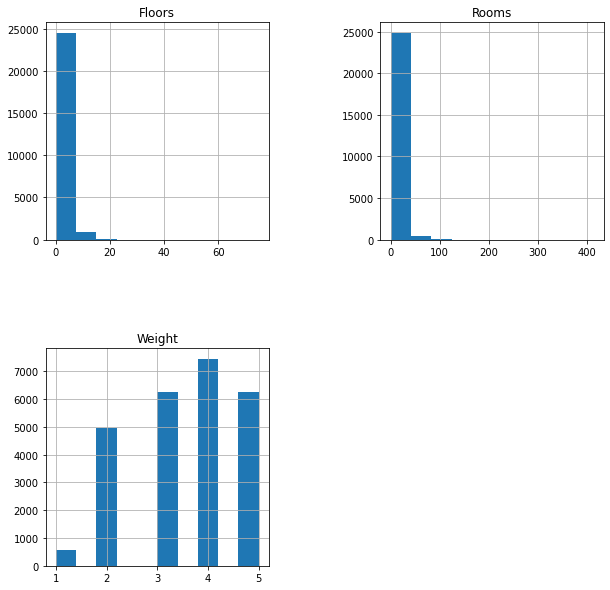

In [ ]:
header = ['Floors','Rooms', 'Weight', 'WOS_Segment']
df.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

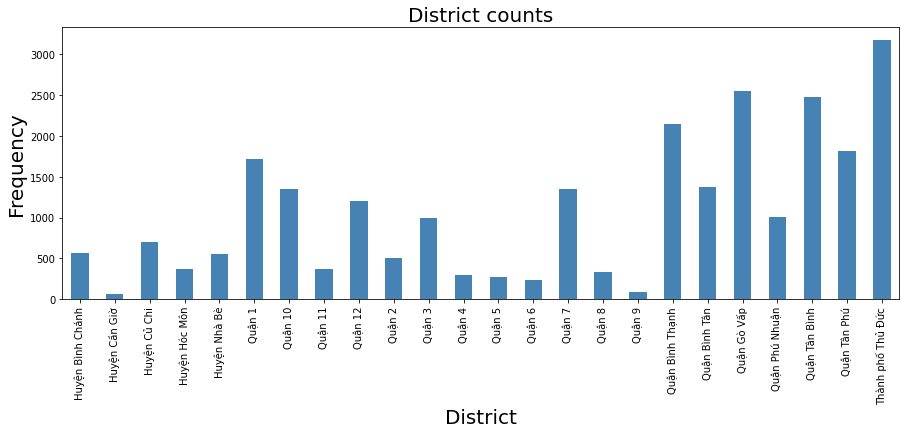

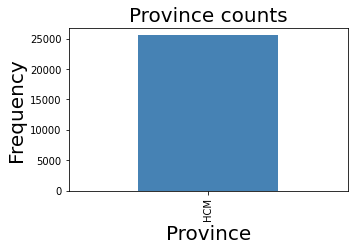

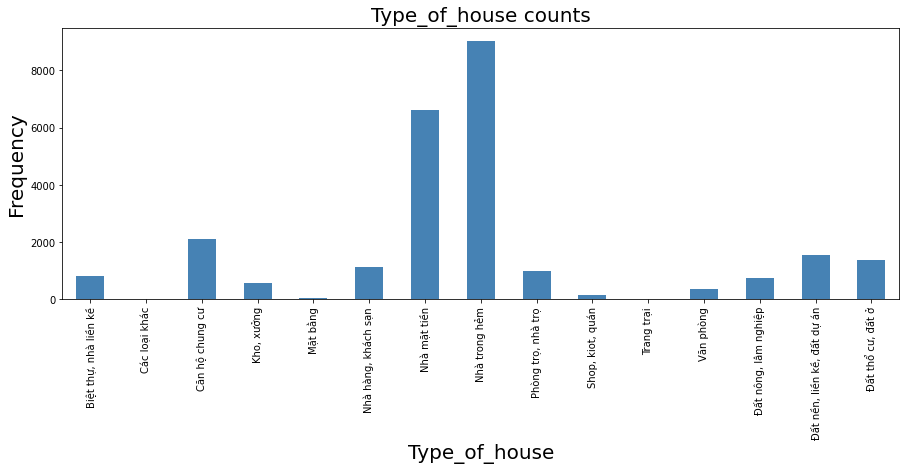

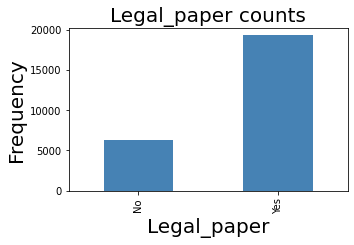

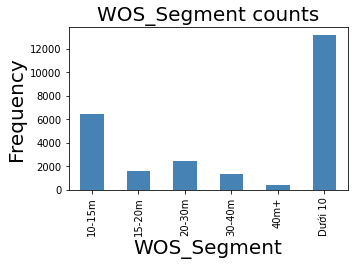

In [ ]:
# plotting graphs for all categorical columns
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(15, 5))
    else:
      fig = plt.figure(figsize=(5, 3))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts',fontsize=20)
    ax.set_xlabel(col, fontsize=20) 
    ax.set_ylabel("Frequency", fontsize=20)
plt.show()

=> Dữ liệu ở phần lớn là nhà mặt tiền, nhà trong hẻm. Cần bổ sung data

In [ ]:
l = np.sort(np.array(df['District'].unique()))
l

array(['Huyện Bình Chánh', 'Huyện Cần Giờ', 'Huyện Củ Chi',
       'Huyện Hóc Môn', 'Huyện Nhà Bè', 'Quận 1', 'Quận 10', 'Quận 11',
       'Quận 12', 'Quận 2', 'Quận 3', 'Quận 4', 'Quận 5', 'Quận 6',
       'Quận 7', 'Quận 8', 'Quận 9', 'Quận Bình Thạnh', 'Quận Bình Tân',
       'Quận Gò Vấp', 'Quận Phú Nhuận', 'Quận Tân Bình', 'Quận Tân Phú',
       'Thành phố Thủ Đức'], dtype=object)

In [ ]:
for i in l:
  print(i)
  print(df['District'][df['District'] == i].count())

Huyện Bình Chánh
568
Huyện Cần Giờ
65
Huyện Củ Chi
696
Huyện Hóc Môn
372
Huyện Nhà Bè
556
Quận 1
1716
Quận 10
1353
Quận 11
372
Quận 12
1202
Quận 2
501
Quận 3
995
Quận 4
292
Quận 5
269
Quận 6
236
Quận 7
1354
Quận 8
334
Quận 9
92
Quận Bình Thạnh
2141
Quận Bình Tân
1378
Quận Gò Vấp
2551
Quận Phú Nhuận
1002
Quận Tân Bình
2479
Quận Tân Phú
1816
Thành phố Thủ Đức
3170


In [ ]:
# df.drop(df[df['District'] == 'Huyện Bình Chánh'].index, inplace = True)
#df.drop(df[df['District'] == 'Huyện Cần Giờ'].index, inplace = True)
# df.drop(df[df['District'] == 'Huyện Củ Chi'].index, inplace = True)
# df.drop(df[df['District'] == 'Huyện Hóc Môn'].index, inplace = True)
# df.drop(df[df['District'] == 'Huyện Nhà Bè'].index, inplace = True)
# df.drop(df[df['District'] == 'Quận 2'].index, inplace = True)
# df.drop(df[df['District'] == 'Quận 3'].index, inplace = True)
# df.drop(df[df['District'] == 'Quận 4'].index, inplace = True)
# df.drop(df[df['District'] == 'Quận 5'].index, inplace = True)
# df.drop(df[df['District'] == 'Quận 6'].index, inplace = True)
# df.drop(df[df['District'] == 'Quận 8'].index, inplace = True)
#df.drop(df[df['District'] == 'Quận 9'].index, inplace = True)
# df.drop(df[df['District'] == 'Quận 11'].index, inplace = True)

In [ ]:
l = df['Type_of_house'].unique()
for i in l:
  print(i)
  print(df['Type_of_house'][df['Type_of_house'] == i].count())

Biệt thự, nhà liền kề
827
Các loại khác
1
Căn hộ chung cư
2098
Kho, xưởng
587
Mặt bằng
65
Nhà hàng, khách sạn
1118
Nhà mặt tiền
6604
Nhà trong hẻm
9045
Phòng trọ, nhà trọ
998
Shop, kiot, quán
147
Trang trại
8
Văn phòng
350
Đất nông, lâm nghiệp
738
Đất nền, liền kề, đất dự án
1545
Đất thổ cư, đất ở
1379


In [ ]:
# df.drop(df[df['Type_of_house'] == 'Biệt thự, nhà liền kề'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Các loại khác'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Kho, xưởng'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Mặt bằng'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Nhà hàng, khách sạn'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Phòng trọ, nhà trọ'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Shop, kiot, quán'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Trang trại'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Văn phòng'].index, inplace = True)
#df.drop(df[df['Type_of_house'] == 'Đất nông, lâm nghiệp'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Đất nền, liền kề, đất dự án'].index, inplace = True)
# df.drop(df[df['Type_of_house'] == 'Đất thổ cư, đất ở'].index, inplace = True)

In [ ]:
l = df['Legal_paper'].unique()
for i in l:
  print(i)
  print(df['District'][df['Legal_paper'] == i].count())

Yes
19261
No
6249


##**Các trường thuộc tính ảnh hưởng đến giá nhà**

In [ ]:
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25510 entries, 12480 to 4746
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       25510 non-null  object 
 1   Province       25510 non-null  object 
 2   Hsdieuchinh    25510 non-null  float64
 3   Type_of_house  25510 non-null  object 
 4   Legal_paper    25510 non-null  object 
 5   WOS            25510 non-null  float64
 6   WOS_Segment    25510 non-null  object 
 7   Area           25510 non-null  float64
 8   Length         25510 non-null  float64
 9   Width          25510 non-null  float64
 10  Rooms          25510 non-null  int64  
 11  Floors         25510 non-null  int64  
 12  Price          25510 non-null  float64
 13  Weight         25510 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 2.9+ MB


In [ ]:
df

,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Weight
12480,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,7.0,Dưới 10,85.0,63.75,1.0,6,4,20800.0,4.0
18161,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.00,9.0,1,2,42000.0,4.0
18162,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.00,9.0,1,2,42000.0,5.0
16604,Quận Gò Vấp,HCM,2.3,"Biệt thự, nhà liền kề",Yes,15.0,15-20m,114.0,19.00,6.0,5,5,27000.0,5.0
4838,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,8.0,Dưới 10,160.0,16.00,1.0,50,7,20000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,16.0,15-20m,216.0,18.00,12.0,0,0,18500.0,2.0
3247,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,5.0,Dưới 10,81.0,21.00,4.0,0,0,4650.0,2.0
3246,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,7.0,Dưới 10,81.0,14.00,6.0,0,0,3600.0,3.0
3244,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,4.0,Dưới 10,210.0,2.00,1.0,0,0,10000.0,2.0


In [ ]:
corr=df.corr()["Price"]
corr[np.argsort(corr, axis=0)[::-1]]

Price          1.000000
Area           0.108088
Length         0.098914
Width          0.098874
Rooms          0.014610
WOS            0.010534
Floors         0.003503
Hsdieuchinh   -0.007740
Weight        -0.015925
Name: Price, dtype: float64

In [ ]:
df.Weight.value_counts()

4.0    7458
5.0    6259
3.0    6255
2.0    4955
1.0     583
Name: Weight, dtype: int64

In [ ]:
df.Price.value_counts()

5000.0       317
7000.0       314
6000.0       287
7500.0       262
6500.0       258
            ... 
1624100.0      1
6599.0         1
48600.0        1
85500.0        1
14257.0        1
Name: Price, Length: 2018, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

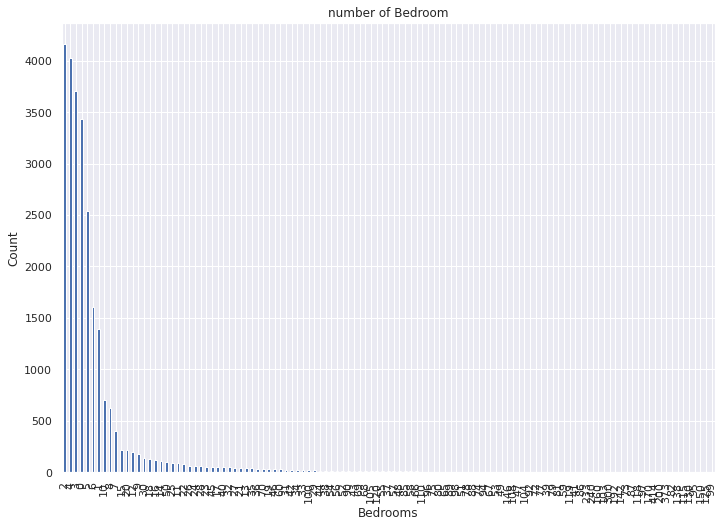

In [ ]:
from matplotlib import figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
df['Rooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

In [ ]:
df.columns

Index(['District', 'Province', 'Hsdieuchinh', 'Type_of_house', 'Legal_paper',
       'WOS', 'WOS_Segment', 'Area', 'Length', 'Width', 'Rooms', 'Floors',
       'Price', 'Weight'],
      dtype='object')

Text(0.5, 1.0, 'Price vs Square Feet')

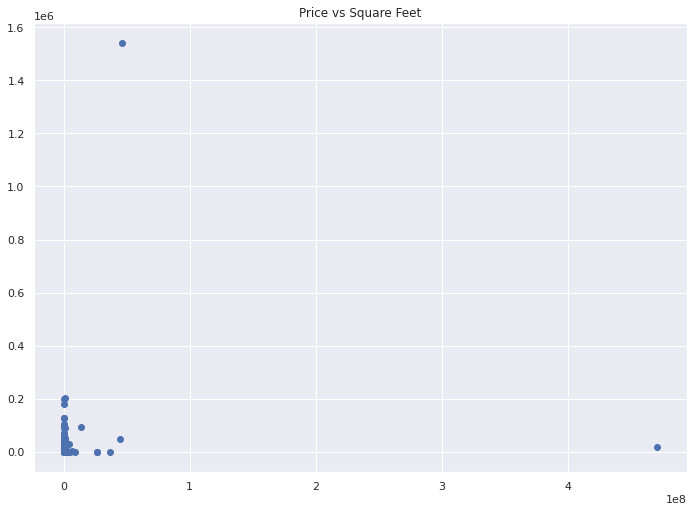

In [ ]:
plt.scatter(df.Price,df.Area)
plt.title("Price vs Square Feet")

In [ ]:
#skewness  

df['Price'].skew()

152.42809578070043

In [ ]:
#kurtosis

df['Price'].kurt()

23890.107577335923

##**Checking For Highly Correlated Columns**

In [ ]:
corr = df.corr()
corr_greater_than_75 = corr[corr>=.75]
#corr_greater_than_75 = corr
corr_greater_than_75 

,Hsdieuchinh,WOS,Area,Length,Width,Rooms,Floors,Price,Weight
Hsdieuchinh,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WOS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,NaN,NaN,1.000000,0.973280,0.972291,NaN,NaN,NaN,NaN
Length,NaN,NaN,0.973280,1.000000,0.998786,NaN,NaN,NaN,NaN
Width,NaN,NaN,0.972291,0.998786,1.000000,NaN,NaN,NaN,NaN
Rooms,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Floors,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


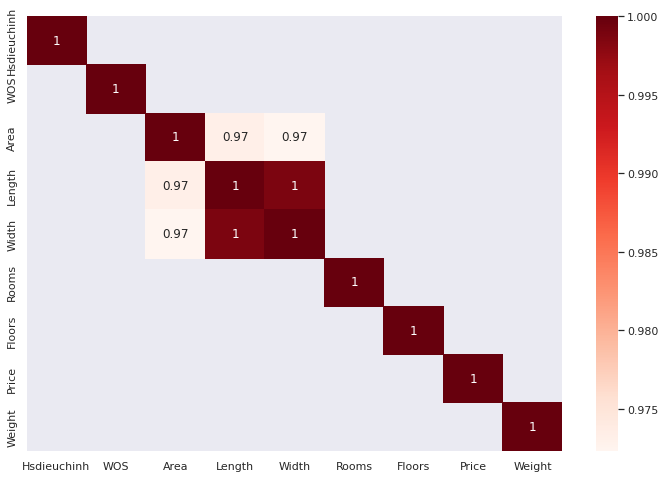

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

##**Removing outliers using IQR method**

In [ ]:
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-3*IQR)) | (df[series]>(Q3+3*IQR)))]
    return df_final

removed_outliers = df
columns_to_remove_outliers = ['Area','Price'] 

for column in columns_to_remove_outliers:
    removed_outliers = remove_outlier_IQR(removed_outliers, column)
    
print("The final length of the dataset is", str(len(removed_outliers)), "rows.")

The final length of the dataset is 21831 rows.


In [ ]:
removed_outliers

,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS,WOS_Segment,Area,Length,Width,Rooms,Floors,Price,Weight
12480,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,7.0,Dưới 10,85.0,63.75,1.0,6,4,20800.0,4.0
18161,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.00,9.0,1,2,42000.0,4.0
18162,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,7.0,Dưới 10,162.0,2.00,9.0,1,2,42000.0,5.0
16604,Quận Gò Vấp,HCM,2.3,"Biệt thự, nhà liền kề",Yes,15.0,15-20m,114.0,19.00,6.0,5,5,27000.0,5.0
4838,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,8.0,Dưới 10,160.0,16.00,1.0,50,7,20000.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,16.0,15-20m,216.0,18.00,12.0,0,0,18500.0,2.0
3247,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,5.0,Dưới 10,81.0,21.00,4.0,0,0,4650.0,2.0
3246,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,7.0,Dưới 10,81.0,14.00,6.0,0,0,3600.0,3.0
3244,Thành phố Thủ Đức,HCM,2.1,"Đất thổ cư, đất ở",Yes,4.0,Dưới 10,210.0,2.00,1.0,0,0,10000.0,2.0


In [ ]:
removed_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21831 entries, 12480 to 4746
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District       21831 non-null  object 
 1   Province       21831 non-null  object 
 2   Hsdieuchinh    21831 non-null  float64
 3   Type_of_house  21831 non-null  object 
 4   Legal_paper    21831 non-null  object 
 5   WOS            21831 non-null  float64
 6   WOS_Segment    21831 non-null  object 
 7   Area           21831 non-null  float64
 8   Length         21831 non-null  float64
 9   Width          21831 non-null  float64
 10  Rooms          21831 non-null  int64  
 11  Floors         21831 non-null  int64  
 12  Price          21831 non-null  float64
 13  Weight         21831 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 2.5+ MB


In [ ]:
df = df.drop(['WOS', 'Length', 'Width'], axis=1)

#**Step6: Building Model**

In [ ]:
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [ ]:
housing = removed_outliers

# Separate predictors and response (price) variables
X = housing.loc[:, housing.columns != 'Price']
y = housing[['Price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=None)

In [ ]:
X_train.shape, y_train.shape

((17464, 13), (17464, 1))

In [ ]:
X_test.shape, y_test.shape

((4367, 13), (4367, 1))

###**Class Training Model**

In [ ]:
df.head()

,District,Province,Hsdieuchinh,Type_of_house,Legal_paper,WOS_Segment,Area,Rooms,Floors,Price,Weight
12480,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,Dưới 10,85.0,6,4,20800.0,4.0
18161,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,Dưới 10,162.0,1,2,42000.0,4.0
18162,Quận 1,HCM,2.5,"Biệt thự, nhà liền kề",No,Dưới 10,162.0,1,2,42000.0,5.0
16604,Quận Gò Vấp,HCM,2.3,"Biệt thự, nhà liền kề",Yes,15-20m,114.0,5,5,27000.0,5.0
4838,Quận Tân Bình,HCM,2.5,"Biệt thự, nhà liền kề",Yes,Dưới 10,160.0,50,7,20000.0,2.0


In [ ]:
# Xóa thử trong so
#df = df.drop(['Weight'], axis=1)

In [ ]:
df.columns

Index(['District', 'Province', 'Hsdieuchinh', 'Type_of_house', 'Legal_paper',
       'WOS_Segment', 'Area', 'Rooms', 'Floors', 'Price', 'Weight'],
      dtype='object')

In [ ]:
import xgboost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# RMSE print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
from sklearn.preprocessing import MinMaxScaler

In [ ]:
class TrainModel:
  """
    Class TrainModel dùng để xây dựng model dự đoán với input là tập dữ liệu đã chia 
    và các model bao gồm RandomForest, Linear Regression, Support Vector Regressor, Decision Tree
    Output là model và score(độ chính xác của model).  
    Class Trainmodel gồm các hàm thành phần:
        + Hàm __init__(): 
              -- contructor khởi tạo các mô hình định (RF, LR, SVR, DT); 
              -- các param mẫu (param_RF) cho việc thực hiện Gridsearch;
              -- column_trans: encode label trong các cột
              -- scaler: chuẩn hóa dữ liệu với Standard Scaler
              -- X_train, X_test, y_train, y_test: các trường dữ liệu phân chia trước khi vào huấn luyện
        + Hàm makepipe(): tạo hệ thống pipe xử lý song song việc encol label model và train model
        + Hàm RandomForest(): xây dựng mô hình hồi quy RandomForest
        + Hàm LinearReg(): xây dựng mô hình hồi quy LinearRegression
        + Hàm SupportVectorReg(): xây dựng mô hình hồi quy SVR
        + Hàm DecisionTree(): xây dựng mô hình hồi quy DT
        + Hàm GridSearch(): dùng công cụ hộ trợ sklearn.GridSearchCV() tuning cho mô hình với tập param mẫu trên toàn bộ dữ liệu train, tìm ra param tốt nhất cho mô hình (best_param_) và score(best_score).

  """
  def __init__(self,X_train, X_test, y_train, y_test):
    self.data = pd.DataFrame({'Model': [], 'Accuracy': [], 'R2': [], 'MAE': [], 'MSE': []})
    self.RF = RandomForestRegressor()
    self.LR =  LinearRegression()
    self.SVR = SVR(C=5000.0, epsilon=1)
    self.DT = DecisionTreeRegressor()
    self.xgboost = xgboost.XGBRegressor()
    self.GBR= GradientBoostingRegressor(n_estimators=2000, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')
    # param mẫu RandomForest cho GridSearch() 
    self.param_RF = {'n_estimators': [100,500,1000,1500,2000],
               'max_features': ['sqrt'],
               'max_depth': [39,40],
               'min_samples_split': [1,2],
               'min_samples_leaf': [1,2]}
    
    self.param_GBR = {'n_estimators': [100,300,400,500,600,1000,1500],
               'max_depth': [10],
               'min_samples_split': [2],
               'learning_rate': [0.5]}



    #encoder label 
    self.column_trans = make_column_transformer((OneHotEncoder(sparse=False),['District']),
                                        (OneHotEncoder(sparse=False),['Province']),
                                        (OneHotEncoder(sparse=False),['Type_of_house']),
                                        (OneHotEncoder(sparse=False),['Legal_paper']),
                                        (OneHotEncoder(sparse=False),['WOS_Segment']),
                                        remainder='passthrough')
    #self.scaler = StandardScaler()
    self.scaler = MinMaxScaler()
    self.X_train = X_train 
    self.X_test = X_test
    self.y_train = y_train
    self.y_test= y_test

  def makepipe(self,model):
    pipe = make_pipeline(self.column_trans,self.scaler,model)
    return pipe
  def get_data(self):
    return self.data  
  def GradientBoostingRegressor(self):
    pipe = self.makepipe(self.GBR)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)
    data_dic = {'Model':'','Accuracy':'','R2':'','MAE':'','MSE':''}
    data_dic['Model'] = 'GradientBoostingRegressor'
    data_dic['R2'] = r2_score(self.y_test,y_predict)
    data_dic['Accuracy'] = pipe.score(self.X_test,self.y_test)
    data_dic['MAE'] = mean_absolute_error(self.y_test,y_predict)
    data_dic['MSE'] = mean_squared_error(self.y_test,y_predict) 
    self.data = self.data.append(data_dic,ignore_index = True) 
    return pipe
  def RandomForest(self):
    pipe = self.makepipe(self.RF)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)
    data_dic = {'Model':'','Accuracy':'','R2':'','MAE':'','MSE':''}
    data_dic['Model'] = 'RandomForest'
    data_dic['R2'] = r2_score(self.y_test,y_predict)
    data_dic['Accuracy'] = pipe.score(self.X_test,self.y_test)
    data_dic['MAE'] = mean_absolute_error(self.y_test,y_predict)
    data_dic['MSE'] = mean_squared_error(self.y_test,y_predict) 
    self.data = self.data.append(data_dic,ignore_index = True)  
    return pipe
  def LinearReg(self):
    pipe = self.makepipe(self.LR)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)
    data_dic = {'Model':'','Accuracy':'','R2':'','MAE':'','MSE':''}
    data_dic['Model'] = 'Linear Regression'
    data_dic['R2'] = r2_score(self.y_test,y_predict)
    data_dic['Accuracy'] = pipe.score(self.X_test,self.y_test)
    data_dic['MAE'] = mean_absolute_error(self.y_test,y_predict)
    data_dic['MSE'] = mean_squared_error(self.y_test,y_predict) 
    self.data = self.data.append(data_dic,ignore_index = True)  
    return pipe
  def SupportVectorReg(self):
    pipe = self.makepipe(self.SVR)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test) 
    data_dic = {'Model':'','Accuracy':'','R2':'','MAE':'','MSE':''}
    data_dic['Model'] = 'Support Vector Machine'
    data_dic['R2'] = r2_score(self.y_test,y_predict)
    data_dic['Accuracy'] = pipe.score(self.X_test,self.y_test)
    data_dic['MAE'] = mean_absolute_error(self.y_test,y_predict)
    data_dic['MSE'] = mean_squared_error(self.y_test,y_predict) 
    self.data = self.data.append(data_dic,ignore_index = True) 
    return pipe
  def DecisionTree(self):
    pipe = self.makepipe(self.DT)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)
    data_dic = {'Model':'','Accuracy':'','R2':'','MAE':'','MSE':''}
    data_dic['Model'] = 'Decision Tree'
    data_dic['R2'] = r2_score(self.y_test,y_predict)
    data_dic['Accuracy'] = pipe.score(self.X_test,self.y_test)
    data_dic['MAE'] = mean_absolute_error(self.y_test,y_predict)
    data_dic['MSE'] = mean_squared_error(self.y_test,y_predict) 
    self.data = self.data.append(data_dic,ignore_index = True)  
    return pipe
  def Xgboost(self):
    pipe = self.makepipe(self.xgboost)
    pipe.fit(self.X_train,self.y_train)  
    y_predict = pipe.predict(self.X_test)
    data_dic = {'Model':'','Accuracy':'','R2':'','MAE':'','MSE':''}
    data_dic['Model'] = 'Xgboost'
    data_dic['R2'] = r2_score(self.y_test,y_predict)
    data_dic['Accuracy'] = pipe.score(self.X_test,self.y_test)
    data_dic['MAE'] = mean_absolute_error(self.y_test,y_predict)
    data_dic['MSE'] = mean_squared_error(self.y_test,y_predict) 
    self.data = self.data.append(data_dic,ignore_index = True)  
    return pipe
    
  def GridSearch(self, name):
    if name == 'Random Forest':
      Grid = self.makepipe(GridSearchCV(estimator=self.RF, param_grid=self.param_RF, 
                              cv=3, verbose=0))
      Grid_search = Grid.fit(self.X_train, np.array(self.y_train).ravel())
    elif name == 'GBR':
      Grid = self.makepipe(GridSearchCV(estimator=self.GBR, param_grid=self.param_GBR, 
                              cv=3, verbose=0))
      Grid_search = Grid.fit(self.X_train, np.array(self.y_train).ravel())
      
    model = self.makepipe(Grid_search[2].best_estimator_).fit(self.X_train, np.array(self.y_train).ravel())
    y_predict = model.predict(self.X_test)
    return Grid_search, model, r2_score(self.y_test,y_predict)
    

###**Modeling**

In [ ]:
model = TrainModel(X_train, X_test, y_train, y_test)

In [ ]:
model.X_train.District.unique()

array(['Quận 10', 'Quận Bình Tân', 'Quận Gò Vấp', 'Thành phố Thủ Đức',
       'Huyện Nhà Bè', 'Quận 7', 'Quận Tân Bình', 'Quận Tân Phú',
       'Quận 2', 'Huyện Bình Chánh', 'Quận 11', 'Quận Phú Nhuận',
       'Quận Bình Thạnh', 'Quận 12', 'Huyện Hóc Môn', 'Quận 4', 'Quận 3',
       'Quận 1', 'Quận 6', 'Quận 5', 'Quận 8', 'Huyện Củ Chi', 'Quận 9',
       'Huyện Cần Giờ'], dtype=object)

####**Gradient Boosting Regressor**

In [ ]:
pipe_GBR = model.GradientBoostingRegressor()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


####**Random Forest**

In [ ]:
pipe_RF = model.RandomForest()

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


####**Linear Regession**

In [ ]:
pipe_LR = model.LinearReg()

####**Support Vector Regressor**

In [ ]:
pipe_SVR = model.SupportVectorReg()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


####**Decision Tree**

In [ ]:
pipe_DT = model.DecisionTree()

###**Evaluate Metrics**


In [ ]:
df_metric = model.get_data()
df_metric

,Model,Accuracy,R2,MAE,MSE
0,GradientBoostingRegressor,0.829096,0.829096,3043.304623,2.784573e+07
1,RandomForest,0.830760,0.830760,2997.342490,2.757463e+07
2,Linear Regression,0.672860,0.672860,4759.592878,5.330167e+07
3,Support Vector Machine,0.740165,0.740165,3694.102351,4.233557e+07
4,Decision Tree,0.676199,0.676199,3769.283282,5.275755e+07


###**Find Best Model with Grid Search**

In [ ]:
#Grid_search_RF, pipe_RF, score = model.GridSearch("Random Forest")
#score

In [ ]:
#Grid_search_RF[2].best_params_

In [ ]:
#Grid_search_GBR, pipe_GBR, score = model.GridSearch("GBR")
#score

In [ ]:
#Grid_search_GBR[2].best_params_

##**Cross Validation**

In [ ]:
pipe_RF

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(sparse=False),
                                                  ['District']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(sparse=False),
                                                  ['Province']),
                                                 ('onehotencoder-3',
                                                  OneHotEncoder(sparse=False),
                                                  ['Type_of_house']),
                                                 ('onehotencoder-4',
                                                  OneHotEncoder(sparse=False),
                                                  ['Legal_paper']),
                                          

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle = True, random_state=True)
scores = cross_val_score(pipe_RF, X, np.array(y).ravel(), cv=kf)

In [ ]:
scores

array([0.8253885 , 0.82014065, 0.8400847 , 0.81230501, 0.8274565 ])

In [ ]:
print(max(scores))

0.8400847019662648


In [ ]:
scores1 = cross_val_score(pipe_GBR, X, np.array(y).ravel(), cv=kf)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in v

In [ ]:
scores1

array([0.81709123, 0.82587024, 0.83227305, 0.81966958, 0.8324198 ])

In [ ]:
print(max(scores1))

0.8324197995911484


##**Save best model**

In [ ]:
# import pickle
# #save the model to disk
# filename = 'finalized_model2.sav'
# pickle.dump(pipe_RF, open(filename, 'wb'))